#### Imports

In [6]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
from pprint import pprint 

In [188]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

import time as t
import os

In [353]:
import numpy as np

In [496]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [508]:
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# Acquire

In [8]:
               
base_url = "https://nextgenstats.nfl.com/stats/passing/2022/REG/all#yards"
driver = webdriver.Chrome(service= Service())

In [9]:
driver.get(base_url)
driver.maximize_window()

In [10]:
tr_elements = driver.find_elements(By.XPATH, '''//tr [@class="el-table__row"]''')

In [11]:
tr_elements2 = driver.find_elements(By.XPATH, '''//tr [@class="el-table__row el-table__row--striped"]''')

In [12]:
tr_elements[0].text

'KC\n2.89\n5.4\n7.5\n-2\n10.2\n52.5\n-0.8\n648\n5250\n41\n12\n105.2\n67.1\n67.2\n-0.1'

In [13]:
tr_elements2[0].text

'LAC\n2.86\n4.5\n6.7\n-2.1\n14.6\n57.2\n-1.9\n699\n4739\n25\n10\n93.2\n68.2\n66.8\n1.5'

In [14]:
driver.find_elements(By.XPATH, '''//a[@class = 'js-navigation-open Link--primary']''')

[]

In [72]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2022'
response = get(url)
response

<Response [200]>

In [60]:
headers = {"User-Agent": "Chrome/91.0.4472.124"}
response = get(url, headers=headers)
response

<Response [403]>

In [73]:
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>
 <!--[if !IE]><html class="no-js non-ie" lang=en-US> <![endif]--> <!--[if IE 7 ]><html class="no-js ie7" lang=en-US> <![endif]--> <!--[if IE 8 ]><html class="no-js ie8" lang=en-US> <![endif]--> <!--[if IE 9 ]><html class="no-js ie9" lang=en-US> <![endif]--> <!--[if gt IE 9]><!--><html class="no-js" lang="en-US"> <!--<![endif]--><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="#3f3f3f" name="theme-color"/><link href="http://gmpg.org/xfn/11" rel="profile"/><meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/><title>Printable NFL Playoff Schedule 2023 Dates &amp; TV | Gridiron Games</title><meta content="Printable NFL Playoff Schedule 2022-2023. Postseason matchups, dates, TV. Wild Card, Divisional Round, Conference Championships, Super Bowl." name="description"/><link href="https://gridirongames.com/nfl-playoff-schedule/" rel="canonical"/> <script class="

In [106]:
soup.find('div', style='font-weight: bold;')

<div style="font-weight: bold;">SEA</div>

In [102]:
soup.find_all('div', style='font-weight: bold;')[:5]

[<div style="font-weight: bold;">SEA</div>,
 <div style="font-weight: bold;">@</div>,
 <div style="font-weight: bold;">SF</div>,
 <div style="font-weight: bold;">FINAL</div>,
 <div style="font-weight: bold;">LAC</div>]

In [144]:
playoffs_2022 = []
for name in soup.find_all('div', style='font-weight: bold;'):
    playoffs_2022.append(name.text)

In [157]:
playoffs_2022

['SEA',
 '@',
 'SF',
 'FINAL',
 'LAC',
 '@',
 'JAX',
 'FINAL',
 'MIA',
 '@',
 'BUF',
 'FINAL',
 'NYG',
 '@',
 'MIN',
 'FINAL',
 'BAL',
 '@',
 'CIN',
 'FINAL',
 'DAL',
 '@',
 'TB',
 'FINAL',
 'JAX',
 '@',
 'KC',
 'FINAL',
 'NYG',
 '@',
 'PHI',
 'FINAL',
 'CIN',
 '@',
 'BUF',
 'FINAL',
 'DAL',
 '@',
 'SF',
 'FINAL',
 'SF',
 '@',
 'PHI',
 'FINAL',
 'CIN',
 '@',
 'KC',
 'FINAL',
 'KC',
 '@',
 'PHI',
 'FINAL']

In [159]:
cleaned_list = [item for item in playoffs_2022 if item not in ('@', 'FINAL')]

In [190]:
df = pd.DataFrame(cleaned_list)

In [222]:
df2 = pd.read_csv('2022_data')

In [223]:
df2.head()

0  0.1     1    2    3    4     5     6    7    8     9  10  \
0  Patrick Mahomes   KC  2.89  5.4  7.5 -2.0  10.2  52.5 -0.8  648  5250  41   
1   Justin Herbert  LAC  2.86  4.5  6.7 -2.1  14.6  57.2 -1.9  699  4739  25   
2        Tom Brady   TB  2.45  4.6  7.0 -2.4  14.9  57.6 -1.5  733  4694  25   
3     Kirk Cousins  MIN  2.83  6.1  7.7 -1.6  14.8  50.5 -1.0  643  4547  29   
4       Joe Burrow  CIN  2.55  5.6  7.2 -1.6  15.3  50.2 -1.4  606  4475  35   

   11     12    13    14   15  year  
0  12  105.2  67.1  67.2 -0.1  2022  
1  10   93.2  68.2  66.8  1.5  2022  
2   9   90.7  66.8  68.2 -1.3  2022  
3  14   92.5  65.9  64.3  1.6  2022  
4  12  100.8  68.3  66.1  2.2  2022

In [227]:
df2 = df2.rename(columns={'0.1': 'team'})

In [228]:
df2.head()

0 team     1    2    3    4     5     6    7    8     9  10  \
0  Patrick Mahomes   KC  2.89  5.4  7.5 -2.0  10.2  52.5 -0.8  648  5250  41   
1   Justin Herbert  LAC  2.86  4.5  6.7 -2.1  14.6  57.2 -1.9  699  4739  25   
2        Tom Brady   TB  2.45  4.6  7.0 -2.4  14.9  57.6 -1.5  733  4694  25   
3     Kirk Cousins  MIN  2.83  6.1  7.7 -1.6  14.8  50.5 -1.0  643  4547  29   
4       Joe Burrow  CIN  2.55  5.6  7.2 -1.6  15.3  50.2 -1.4  606  4475  35   

   11     12    13    14   15  year  
0  12  105.2  67.1  67.2 -0.1  2022  
1  10   93.2  68.2  66.8  1.5  2022  
2   9   90.7  66.8  68.2 -1.3  2022  
3  14   92.5  65.9  64.3  1.6  2022  
4  12  100.8  68.3  66.1  2.2  2022

In [194]:

df = df.rename(columns={0: 'team'})

In [195]:
df.head()

team
0  SEA
1   SF
2  LAC
3  JAX
4  MIA

In [236]:
df2['first_round'] = df2.team.isin(first_round_df.team)

In [241]:
df2.first_round = df2.first_round.astype(int)

In [242]:
df2

0 team     1    2     3    4     5     6    7    8     9  \
0     Patrick Mahomes   KC  2.89  5.4   7.5 -2.0  10.2  52.5 -0.8  648  5250   
1      Justin Herbert  LAC  2.86  4.5   6.7 -2.1  14.6  57.2 -1.9  699  4739   
2           Tom Brady   TB  2.45  4.6   7.0 -2.4  14.9  57.6 -1.5  733  4694   
3        Kirk Cousins  MIN  2.83  6.1   7.7 -1.6  14.8  50.5 -1.0  643  4547   
4          Joe Burrow  CIN  2.55  5.6   7.2 -1.6  15.3  50.2 -1.4  606  4475   
5          Jared Goff  DET  2.75  5.6   7.2 -1.5  12.8  58.2 -1.3  587  4438   
6          Josh Allen  BUF  2.87  7.4   9.4 -2.0  12.3  62.2  0.7  567  4283   
7          Geno Smith  SEA  2.81  6.3   8.0 -1.6  13.1  51.8 -1.2  572  4282   
8     Trevor Lawrence  JAX  2.59  5.1   7.5 -2.4  10.8  50.1 -1.4  584  4113   
9         Jalen Hurts  PHI  2.76  6.1   8.3 -2.2  15.2  58.7 -0.8  460  3701   
10      Aaron Rodgers   GB  2.70  4.9   8.0 -3.1  15.1  56.3 -0.5  542  3695   
11     Tua Tagovailoa  MIA  2.60  8.5   9.6 -1.1  14.5  56.1  0.7  400  3548   
12     Russell Wilson  DEN  2.98  6.0   8.8 -2.8  14.9  54.1 -0.8  483  3524   
13         Derek Carr   LV  2.93  6.4   9.3 -2.9  18.9  56.1 -0.2  502  3522   
14       Daniel Jones  NYG  2.90  4.9   6.3 -1.5  13.8  55.5 -2.8  472  3205   
15        Davis Mills  HOU  2.78  5.4   7.9 -2.5  15.2  52.9 -1.2  479  3118   
16          Matt Ryan  IND  2.69  5.2   6.4 -1.2  16.3  51.9 -2.6  461  3057   
17          Mac Jones   NE  2.69  5.2   7.8 -2.6  14.0  51.5 -1.3  442  2997   
18        Andy Dalton   NO  2.62  6.0   7.8 -1.8  15.3  51.0 -0.8  378  2871   
19       Dak Prescott  DAL  2.72  6.2   8.3 -2.1  19.8  62.1 -0.4  394  2860   
20    Jacoby Brissett  CLE  2.89  6.5   9.1 -2.6  16.0  55.9  0.4  369  2608   
21     Ryan Tannehill  TEN  2.73  6.3   7.9 -1.6  18.5  61.7 -1.0  325  2536   
22    Jimmy Garoppolo   SF  2.66  4.7   6.8 -2.2  14.0  44.6 -2.1  308  2437   
23      Kenny Pickett  PIT  2.98  5.5   7.8 -2.3  15.4  47.3 -1.2  389  2404   
24       Kyler Murray  ARI  2.65  4.1   6.7 -2.6  12.6  39.0 -2.1  390  2368   
25      Lamar Jackson  BAL  3.00  6.1   8.8 -2.7  11.0  63.2 -0.4  326  2242   
26      Justin Fields  CHI  3.12  6.5   8.9 -2.5   9.1  59.0 -0.4  318  2242   
27     Marcus Mariota  ATL  2.93  7.0  10.2 -3.2  17.3  46.6  1.3  300  2219   
28     Baker Mayfield  LAR  2.82  5.0   6.8 -1.8  13.7  54.7 -2.4  335  2163   
29   Matthew Stafford  LAR  2.72  4.6   6.7 -2.0  13.5  58.7 -1.7  303  2087   
30    Taylor Heinicke  WAS  2.95  6.7   9.0 -2.3  16.2  58.1  0.4  259  1859   
31       Carson Wentz  WAS  2.60  5.3   7.9 -2.6  17.4  54.5 -0.9  276  1755   
32        Zach Wilson  NYJ  3.13  6.3   9.2 -2.9  15.7  58.3 -0.2  242  1688   
33        Brock Purdy   SF  2.84  5.9   6.7 -0.8   9.4  44.5 -2.1  170  1374   
34  Mitchell Trubisky  PIT  2.76  7.4   9.7 -2.3  24.4  52.7  0.8  180  1252   
35         Mike White  NYJ  2.80  5.7   7.6 -1.9  20.6  38.3 -1.6  175  1192   
36        Sam Darnold  CAR  3.24  6.9   9.1 -2.2  15.0  58.5  0.6  140  1143   
37     Deshaun Watson  CLE  3.27  5.6   7.4 -1.8  13.5  36.7 -1.8  170  1102   
38        Cooper Rush  DAL  2.57  6.3   8.2 -1.9  20.4  47.2 -0.4  162  1051   
39         Joe Flacco  NYJ  2.75  5.5   8.2 -2.7  15.2  56.0 -1.0  191  1051   

    10  11     12    13    14   15  year  first_round  
0   41  12  105.2  67.1  67.2 -0.1  2022            0  
1   25  10   93.2  68.2  66.8  1.5  2022            1  
2   25   9   90.7  66.8  68.2 -1.3  2022            1  
3   29  14   92.5  65.9  64.3  1.6  2022            1  
4   35  12  100.8  68.3  66.1  2.2  2022            1  
5   29   7   99.3  65.1  67.5 -2.5  2022            0  
6   35  14   96.6  63.3  64.2 -0.9  2022            1  
7   30  11  100.9  69.8  65.3  4.4  2022            1  
8   25   8   95.2  66.3  66.8 -0.5  2022            1  
9   22   6  101.5  66.5  63.7  2.8  2022            0  
10  26  12   91.1  64.6  66.1 -1.6  2022            0  
11  25   8  105.5  64.8  65.1 -0.4  2022            1  
12  16  11 

In [198]:
first_round_df = df.iloc[:12]

In [232]:
first_round_df.team

0     SEA
1      SF
2     LAC
3     JAX
4     MIA
5     BUF
6     NYG
7     MIN
8     BAL
9     CIN
10    DAL
11     TB
Name: team, dtype: object

In [244]:
df2['divisional_round'] = df2.team.isin(divisional_round_df.team)

In [245]:
df2.divisional_round = df2.divisional_round.astype(int)

In [199]:
divisional_round_df = df.iloc[12:20]

In [218]:
divisional_round_df

team
12  JAX
13   KC
14  NYG
15  PHI
16  CIN
17  BUF
18  DAL
19   SF

In [247]:
df2.head()

0 team     1    2    3    4     5     6    7    8     9  10  \
0  Patrick Mahomes   KC  2.89  5.4  7.5 -2.0  10.2  52.5 -0.8  648  5250  41   
1   Justin Herbert  LAC  2.86  4.5  6.7 -2.1  14.6  57.2 -1.9  699  4739  25   
2        Tom Brady   TB  2.45  4.6  7.0 -2.4  14.9  57.6 -1.5  733  4694  25   
3     Kirk Cousins  MIN  2.83  6.1  7.7 -1.6  14.8  50.5 -1.0  643  4547  29   
4       Joe Burrow  CIN  2.55  5.6  7.2 -1.6  15.3  50.2 -1.4  606  4475  35   

   11     12    13    14   15  year  first_round  divisional_round  
0  12  105.2  67.1  67.2 -0.1  2022            0                 1  
1  10   93.2  68.2  66.8  1.5  2022            1                 0  
2   9   90.7  66.8  68.2 -1.3  2022            1                 0  
3  14   92.5  65.9  64.3  1.6  2022            1                 0  
4  12  100.8  68.3  66.1  2.2  2022            1                 1

In [248]:
df2['conference_championship'] = df2.team.isin(conference_championship_df.team)

In [249]:
df2.conference_championship = df2.conference_championship.astype(int)

In [200]:
conference_championship_df = df.iloc[20:24]

In [219]:
conference_championship_df

team
20   SF
21  PHI
22  CIN
23   KC

In [252]:
df2['superbowl'] = df2.team.isin(superbowl_df.team)

In [253]:
df2.superbowl = df2.superbowl.astype(int)

In [206]:
superbowl_df = df.iloc[24:]

In [220]:
superbowl_df

team
24   KC
25  PHI

In [358]:
df2['won_superbowl'] = np.where(df2['team'] == 'KC', 1, 0)

In [359]:
df2

0 team     1    2     3    4     5     6    7    8  ...  \
0     Patrick Mahomes   KC  2.89  5.4   7.5 -2.0  10.2  52.5 -0.8  648  ...   
1      Justin Herbert  LAC  2.86  4.5   6.7 -2.1  14.6  57.2 -1.9  699  ...   
2           Tom Brady   TB  2.45  4.6   7.0 -2.4  14.9  57.6 -1.5  733  ...   
3        Kirk Cousins  MIN  2.83  6.1   7.7 -1.6  14.8  50.5 -1.0  643  ...   
4          Joe Burrow  CIN  2.55  5.6   7.2 -1.6  15.3  50.2 -1.4  606  ...   
5          Jared Goff  DET  2.75  5.6   7.2 -1.5  12.8  58.2 -1.3  587  ...   
6          Josh Allen  BUF  2.87  7.4   9.4 -2.0  12.3  62.2  0.7  567  ...   
7          Geno Smith  SEA  2.81  6.3   8.0 -1.6  13.1  51.8 -1.2  572  ...   
8     Trevor Lawrence  JAX  2.59  5.1   7.5 -2.4  10.8  50.1 -1.4  584  ...   
9         Jalen Hurts  PHI  2.76  6.1   8.3 -2.2  15.2  58.7 -0.8  460  ...   
10      Aaron Rodgers   GB  2.70  4.9   8.0 -3.1  15.1  56.3 -0.5  542  ...   
11     Tua Tagovailoa  MIA  2.60  8.5   9.6 -1.1  14.5  56.1  0.7  400  ...   
12     Russell Wilson  DEN  2.98  6.0   8.8 -2.8  14.9  54.1 -0.8  483  ...   
13         Derek Carr   LV  2.93  6.4   9.3 -2.9  18.9  56.1 -0.2  502  ...   
14       Daniel Jones  NYG  2.90  4.9   6.3 -1.5  13.8  55.5 -2.8  472  ...   
15        Davis Mills  HOU  2.78  5.4   7.9 -2.5  15.2  52.9 -1.2  479  ...   
16          Matt Ryan  IND  2.69  5.2   6.4 -1.2  16.3  51.9 -2.6  461  ...   
17          Mac Jones   NE  2.69  5.2   7.8 -2.6  14.0  51.5 -1.3  442  ...   
18        Andy Dalton   NO  2.62  6.0   7.8 -1.8  15.3  51.0 -0.8  378  ...   
19       Dak Prescott  DAL  2.72  6.2   8.3 -2.1  19.8  62.1 -0.4  394  ...   
20    Jacoby Brissett  CLE  2.89  6.5   9.1 -2.6  16.0  55.9  0.4  369  ...   
21     Ryan Tannehill  TEN  2.73  6.3   7.9 -1.6  18.5  61.7 -1.0  325  ...   
22    Jimmy Garoppolo   SF  2.66  4.7   6.8 -2.2  14.0  44.6 -2.1  308  ...   
23      Kenny Pickett  PIT  2.98  5.5   7.8 -2.3  15.4  47.3 -1.2  389  ...   
24       Kyler Murray  ARI  2.65  4.1   6.7 -2.6  12.6  39.0 -2.1  390  ...   
25      Lamar Jackson  BAL  3.00  6.1   8.8 -2.7  11.0  63.2 -0.4  326  ...   
26      Justin Fields  CHI  3.12  6.5   8.9 -2.5   9.1  59.0 -0.4  318  ...   
27     Marcus Mariota  ATL  2.93  7.0  10.2 -3.2  17.3  46.6  1.3  300  ...   
28     Baker Mayfield  LAR  2.82  5.0   6.8 -1.8  13.7  54.7 -2.4  335  ...   
29   Matthew Stafford  LAR  2.72  4.6   6.7 -2.0  13.5  58.7 -1.7  303  ...   
30    Taylor Heinicke  WAS  2.95  6.7   9.0 -2.3  16.2  58.1  0.4  259  ...   
31       Carson Wentz  WAS  2.60  5.3   7.9 -2.6  17.4  54.5 -0.9  276  ...   
32        Zach Wilson  NYJ  3.13  6.3   9.2 -2.9  15.7  58.3 -0.2  242  ...   
33        Brock Purdy   SF  2.84  5.9   6.7 -0.8   9.4  44.5 -2.1  170  ...   
34  Mitchell Trubisky  PIT  2.76  7.4   9.7 -2.3  24.4  52.7  0.8  180  ...   
35         Mike White  NYJ  2.80  5.7   7.6 -1.9  20.6  38.3 -1.6  175  ...   
36        Sam Darnold  CAR  3.24  6.9   9.1 -2.2  15.0  58.5  0.6  140  ...   
37     Deshaun Watson  CLE  3.27  5.6   7.4 -1.8  13.5  36.7 -1.8  170  ...   
38        Cooper Rush  DAL  2.57  6.3   8.2 -1.9  20.4  47.2 -0.4  162  ...   
39         Joe Flacco  NYJ  2.75  5.5   8.2 -2.7  15.2  56.0 -1.0  191  ...   

       12    13    14   15  year  first_round  divisional_round  \
0   105.2  67.1  67.2 -0.1  2022            0                 1   
1    93.2  68.2  66.8  1.5  2022            1                 0   
2    90.7  66.8  68.2 -1.3  2022            1                 0   
3    92.5  65.9  64.3  1.6  2022            1                 0   
4   100.8  68.3  66.1  2.2  2022            1                 1   
5    99.3  65.1  67.5 -2.5  2022            0                 0   
6    96.6  63.3  64.2 -0.9  2022            1                 1   
7   100.9  69.8  65.3  4.4  2022            1                 0   
8    95.2  66.3  66.8 -0.5  2022            1                 1   
9   101.5  66.5  63.7  2.8  2022            0                 1   
10   91.1  64.6  66.1 -1.6  2022           

In [361]:

df2.to_csv('2022_data', index=False)

In [317]:
def get_playoff_teams(url):
    response = get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    playoffs_list = []
    for name in soup.find_all('div', style='font-weight: bold;'):
        playoffs_list.append(name.text)
    cleaned_list = [item for item in playoffs_list if item not in ('@', 'FINAL', 'FINAL OT')]
    df = pd.DataFrame(cleaned_list)
    return df

In [270]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2021'
response = get(url)

In [271]:
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>
 <!--[if !IE]><html class="no-js non-ie" lang=en-US> <![endif]--> <!--[if IE 7 ]><html class="no-js ie7" lang=en-US> <![endif]--> <!--[if IE 8 ]><html class="no-js ie8" lang=en-US> <![endif]--> <!--[if IE 9 ]><html class="no-js ie9" lang=en-US> <![endif]--> <!--[if gt IE 9]><!--><html class="no-js" lang="en-US"> <!--<![endif]--><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="#3f3f3f" name="theme-color"/><link href="http://gmpg.org/xfn/11" rel="profile"/><meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/><title>Printable NFL Playoff Schedule 2023 Dates &amp; TV | Gridiron Games</title><meta content="Printable NFL Playoff Schedule 2022-2023. Postseason matchups, dates, TV. Wild Card, Divisional Round, Conference Championships, Super Bowl." name="description"/><link href="https://gridirongames.com/nfl-playoff-schedule/" rel="canonical"/> <script class="

In [274]:
soup.find_all('div', style='font-weight: bold;')

In [ ]:
playoffs_2021 = []
for name in soup.find_all('div', style='font-weight: bold;'):
    playoffs_2021.append(name.text)

In [ ]:
cleaned_list = [item for item in playoffs_2022 if item not in ('@', 'FINAL')]

In [ ]:
df = pd.DataFrame(cleaned_list)

In [275]:
df3 = get_playoff_teams(url)

In [276]:
df3

0
0    LV
1   CIN
2    NE
3   BUF
4   PHI
5    TB
6    SF
7   DAL
8   PIT
9    KC
10  ARI
11  LAR
12  CIN
13  TEN
14   SF
15   GB
16  LAR
17   TB
18  BUF
19   KC
20  CIN
21   KC
22   SF
23  LAR
24  CIN
25  LAR

In [284]:
df4 = pd.read_csv('2021_data')

In [286]:
df4.head()

0  0.1     1    2    3    4     5     6    7    8     9  10  \
0         Tom Brady   TB  2.50  5.5  8.0 -2.5  14.0  51.8 -0.4  719  5315  43   
1    Justin Herbert  LAC  2.83  5.8  7.6 -1.8  17.6  63.8 -0.9  672  5014  38   
2  Matthew Stafford  LAR  2.80  6.7  8.5 -1.8  12.1  58.4  0.1  601  4886  41   
3   Patrick Mahomes   KC  2.84  4.8  7.3 -2.5   8.7  54.7 -1.2  658  4839  37   
4        Derek Carr   LV  2.82  5.6  8.0 -2.5  13.6  55.6 -0.8  626  4804  23   

   11     12    13    14   15  year  
0  12  102.1  67.5  68.4 -1.0  2021  
1  15   97.7  65.9  66.3 -0.3  2021  
2  17  102.9  67.2  67.8 -0.6  2021  
3  13   98.5  66.3  68.3 -2.1  2021  
4  14   94.0  68.4  66.2  2.2  2021

In [ ]:
# df4 = df4.rename(columns={'0.1': 'team'})

In [298]:
def add_playoffs_to_stats_data(df, df2):
    
    df2 = df2.rename(columns={'0.1': 'team'})
    df = df.rename(columns={0: 'team'})
    
    first_round_df = df.iloc[:12]
    divisional_round_df = df.iloc[12:20]
    conference_championship_df = df.iloc[20:24]
    superbowl_df = df.iloc[24:]
    
    df2['first_round'] = df2.team.isin(first_round_df.team)
    df2.first_round = df2.first_round.astype(int)
    
    df2['divisional_round'] = df2.team.isin(divisional_round_df.team)
    df2.divisional_round = df2.divisional_round.astype(int)
    
    df2['conference_championship'] = df2.team.isin(conference_championship_df.team)
    df2.conference_championship = df2.conference_championship.astype(int)
    
    df2['superbowl'] = df2.team.isin(superbowl_df.team)
    df2.superbowl = df2.superbowl.astype(int)
    
    return df2

In [ ]:
first_round_df = df.iloc[:12]
df2['first_round'] = df2.team.isin(first_round_df.team)
df2.first_round = df2.first_round.astype(int)

In [ ]:
divisional_round_df = df.iloc[12:20]
df2['divisional_round'] = df2.team.isin(divisional_round_df.team)
df2.divisional_round = df2.divisional_round.astype(int)

In [ ]:
conference_championship_df = df.iloc[20:24]
df2['conference_championship'] = df2.team.isin(conference_championship_df.team)
df2.conference_championship = df2.conference_championship.astype(int)

In [ ]:
superbowl_df = df.iloc[24:]
df2['superbowl'] = df2.team.isin(superbowl_df.team)
df2.superbowl = df2.superbowl.astype(int)

In [299]:
df5 = add_playoffs_to_stats_data(df3, df4)

In [362]:
df5['won_superbowl'] = np.where(df5['team'] == 'LAR', 1, 0)

In [363]:
df5.head()

0 team     1    2    3    4     5     6    7    8  ...  \
0         Tom Brady   TB  2.50  5.5  8.0 -2.5  14.0  51.8 -0.4  719  ...   
1    Justin Herbert  LAC  2.83  5.8  7.6 -1.8  17.6  63.8 -0.9  672  ...   
2  Matthew Stafford  LAR  2.80  6.7  8.5 -1.8  12.1  58.4  0.1  601  ...   
3   Patrick Mahomes   KC  2.84  4.8  7.3 -2.5   8.7  54.7 -1.2  658  ...   
4        Derek Carr   LV  2.82  5.6  8.0 -2.5  13.6  55.6 -0.8  626  ...   

      12    13    14   15  year  first_round  divisional_round  \
0  102.1  67.5  68.4 -1.0  2021            1                 1   
1   97.7  65.9  66.3 -0.3  2021            0                 0   
2  102.9  67.2  67.8 -0.6  2021            1                 1   
3   98.5  66.3  68.3 -2.1  2021            1                 1   
4   94.0  68.4  66.2  2.2  2021            1                 0   

   conference_championship  superbowl  won_superbowl  
0                        0          0              0  
1                        0          0              0  
2                        1          1              1  
3                        1          0              0  
4                        0          0              0  

[5 rows x 23 columns]

In [365]:
df5.to_csv('2021_data', index=False)

In [303]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2020'

In [304]:
df6 = get_playoff_teams(url)

In [305]:
df7 = pd.read_csv('2020_data')

In [306]:
df8 = add_playoffs_to_stats_data(df6, df7)

In [366]:
df8['won_superbowl'] = np.where(df8['team'] == 'TB', 1, 0)

In [367]:
df8.head()

0 team     1    2    3    4     5     6    7    8  ...  \
0   Deshaun Watson  HOU  2.85  7.3  9.0 -1.7  14.5  63.4  0.2  544  ...   
1  Patrick Mahomes   KC  2.89  6.3  8.5 -2.2  11.4  60.9 -0.3  588  ...   
2        Tom Brady   TB  2.57  7.0  9.3 -2.3  14.8  55.5  0.5  610  ...   
3        Matt Ryan  ATL  2.87  7.2  8.9 -1.7  14.7  56.7  0.3  626  ...   
4       Josh Allen  BUF  3.04  6.9  8.8 -1.9  13.1  62.8 -0.4  572  ...   

      12    13    14   15  year  first_round  divisional_round  \
0  112.4  70.2  65.4  4.8  2020            0                 0   
1  108.2  66.3  67.2 -0.9  2020            0                 1   
2  102.2  65.7  64.4  1.3  2020            1                 1   
3   93.3  65.0  64.2  0.9  2020            0                 0   
4  107.2  69.2  64.6  4.6  2020            1                 1   

   conference_championship  superbowl  won_superbowl  
0                        0          0              0  
1                        1          1              0  
2                        1          1              1  
3                        0          0              0  
4                        1          0              0  

[5 rows x 23 columns]

In [368]:
df8.to_csv('2020_data', index=False)

In [329]:
def add_playoffs_to_stats_data2(df, df2):
    
    df2 = df2.rename(columns={'0.1': 'team'})
    df = df.rename(columns={0: 'team'})
    
    first_round_df = df.iloc[:8]
    divisional_round_df = df.iloc[8:16]
    conference_championship_df = df.iloc[16:20]
    superbowl_df = df.iloc[20:]
    
    df2['first_round'] = df2.team.isin(first_round_df.team)
    df2.first_round = df2.first_round.astype(int)
    
    df2['divisional_round'] = df2.team.isin(divisional_round_df.team)
    df2.divisional_round = df2.divisional_round.astype(int)
    
    df2['conference_championship'] = df2.team.isin(conference_championship_df.team)
    df2.conference_championship = df2.conference_championship.astype(int)
    
    df2['superbowl'] = df2.team.isin(superbowl_df.team)
    df2.superbowl = df2.superbowl.astype(int)
    
    return df2

In [325]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2019'

In [326]:
df9 = get_playoff_teams(url)

In [327]:
df10 = pd.read_csv('2019_data')

In [330]:
df11 = add_playoffs_to_stats_data2(df9, df10)

In [371]:
df11['won_superbowl'] = np.where(df11['team'] == 'KC', 1, 0)

In [372]:
df11.head()

0 team     1    2     3    4     5     6    7    8  ...    12  \
0  Jameis Winston   TB  2.77  8.2  10.5 -2.3  16.8  58.2  1.4  626  ...  84.3   
1    Dak Prescott  DAL  2.88  7.6   9.4 -1.8  18.0  56.2  0.6  596  ...  99.7   
2      Jared Goff  LAR  2.80  5.9   7.8 -1.9  12.8  60.5 -1.2  626  ...  86.5   
3   Philip Rivers  LAC  2.63  6.0   8.6 -2.6  17.1  56.5 -0.7  591  ...  88.5   
4       Matt Ryan  ATL  2.77  6.8   8.3 -1.5  16.6  52.2 -1.2  616  ...  92.1   

     13    14   15  year  first_round  divisional_round  \
0  60.7  60.8 -0.1  2019            0                 0   
1  65.1  62.6  2.5  2019            0                 0   
2  62.9  66.5 -3.6  2019            0                 0   
3  66.0  64.0  1.9  2019            0                 0   
4  66.2  64.8  1.4  2019            0                 0   

   conference_championship  superbowl  won_superbowl  
0                        0          0              0  
1                        0          0              0  
2                        0          0              0  
3                        0          0              0  
4                        0          0              0  

[5 rows x 23 columns]

In [373]:
df11.to_csv('2019_data', index=False)

In [333]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2018'

In [334]:
df12 = get_playoff_teams(url)

In [335]:
df13 = pd.read_csv('2018_data')

In [336]:
df14 = add_playoffs_to_stats_data2(df12, df13)

In [375]:
df14['won_superbowl'] = np.where(df14['team'] == 'NE', 1, 0)

In [377]:
df14.head()

0 team     1    2    3    4     5     6    7    8  ...  \
0  Ben Roethlisberger  PIT  2.55  4.8  7.7 -2.9  16.9  52.9 -0.9  675  ...   
1     Patrick Mahomes   KC  2.91  6.4  9.2 -2.8  12.2  60.7  0.2  580  ...   
2           Matt Ryan  ATL  2.68  6.5  8.5 -2.0  16.8  54.9 -0.5  608  ...   
3          Jared Goff  LAR  2.95  7.0  8.8 -1.9  13.2  62.7  0.1  561  ...   
4         Andrew Luck  IND  2.63  6.1  7.6 -1.5  18.0  51.7 -1.2  639  ...   

      12    13    14   15  year  first_round  divisional_round  \
0   96.5  67.0  66.7  0.3  2018            0                 0   
1  113.8  66.0  64.8  1.2  2018            0                 1   
2  107.4  69.4  65.3  4.1  2018            0                 0   
3  101.1  64.9  64.3  0.6  2018            0                 1   
4   98.7  67.3  66.4  0.9  2018            1                 1   

   conference_championship  superbowl  won_superbowl  
0                        0          0              0  
1                        1          0              0  
2                        0          0              0  
3                        1          1              0  
4                        0          0              0  

[5 rows x 23 columns]

In [378]:
df14.to_csv('2018_data', index=False)

In [339]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2017'

In [340]:
df15 = get_playoff_teams(url)

In [341]:
df16 = pd.read_csv('2017_data')

In [342]:
df17 = add_playoffs_to_stats_data2(df15, df16)

In [381]:
df17['won_superbowl'] = np.where(df17['team'] == 'PHI', 1, 0)

In [382]:
df17.head()

0 team     1    2    3    4     5     6    7    8  ...  \
0           Tom Brady   NE  2.71  6.6  9.0 -2.4  17.0  58.0  0.2  581  ...   
1       Philip Rivers  LAC  2.61  6.3  8.3 -1.9  16.7  56.2 -0.8  575  ...   
2    Matthew Stafford  DET  2.65  6.0  8.0 -2.0  19.6  57.1 -1.2  565  ...   
3          Drew Brees   NO  2.58  4.8  6.3 -1.5  16.6  54.1 -2.5  535  ...   
4  Ben Roethlisberger  PIT  2.56  5.9  9.2 -3.3  19.1  54.9  0.4  561  ...   

      12    13    14   15  year  first_round  divisional_round  \
0  102.7  66.3  65.7  0.5  2017            0                 1   
1   96.0  62.6  65.6 -3.0  2017            0                 0   
2   99.3  65.7  64.7  0.9  2017            0                 0   
3  104.9  72.1  68.7  3.5  2017            1                 1   
4   93.4  64.2  64.5 -0.3  2017            0                 1   

   conference_championship  superbowl  won_superbowl  
0                        1          1              0  
1                        0          0              0  
2                        0          0              0  
3                        0          0              0  
4                        0          0              0  

[5 rows x 23 columns]

In [383]:
df17.to_csv('2017_data', index=False)

In [417]:
url = 'https://gridirongames.com/nfl-playoff-schedule/?Year=2016'

In [418]:
df = get_playoff_teams(url)

In [420]:
df.head()

0
0  OAK
1  HOU
2  DET
3  SEA
4  MIA

In [421]:
df2 = pd.read_csv('2016_data')

In [423]:
df2.head()

0  0.1     1    2    3    4     5     6    7    8     9  10  \
0     Drew Brees   NO  2.42  6.2  7.6 -1.4  17.5  52.2 -1.0  673  5208  37   
1      Matt Ryan  ATL  2.64  7.2  9.0 -1.8  21.0  61.4 -0.2  534  4944  38   
2   Kirk Cousins  WAS  2.81  7.5  9.4 -1.9  14.0  57.5  0.7  605  4917  25   
3  Aaron Rodgers   GB  2.87  6.3  9.2 -3.0  16.4  60.8  0.8  610  4428  40   
4  Philip Rivers  LAC  2.65  6.7  8.8 -2.1  18.7  57.6  0.0  578  4386  33   

   11     12    13    14   15  year  
0  15  101.7  70.0  65.4  4.6  2016  
1   7  117.1  69.9  62.4  7.4  2016  
2  12   97.4  67.1  58.7  8.4  2016  
3   7  104.2  65.7  62.2  3.5  2016  
4  21   87.9  60.4  61.7 -1.3  2016

In [424]:
df3 = add_playoffs_to_stats_data2(df, df2)

In [426]:
df3['won_superbowl'] = np.where(df3['team'] == 'NE', 1, 0)

In [430]:
df3.head()

0 team     1    2    3    4     5     6    7    8  ...     12  \
0     Drew Brees   NO  2.42  6.2  7.6 -1.4  17.5  52.2 -1.0  673  ...  101.7   
1      Matt Ryan  ATL  2.64  7.2  9.0 -1.8  21.0  61.4 -0.2  534  ...  117.1   
2   Kirk Cousins  WAS  2.81  7.5  9.4 -1.9  14.0  57.5  0.7  605  ...   97.4   
3  Aaron Rodgers   GB  2.87  6.3  9.2 -3.0  16.4  60.8  0.8  610  ...  104.2   
4  Philip Rivers  LAC  2.65  6.7  8.8 -2.1  18.7  57.6  0.0  578  ...   87.9   

     13    14   15  year  first_round  divisional_round  \
0  70.0  65.4  4.6  2016            0                 0   
1  69.9  62.4  7.4  2016            0                 1   
2  67.1  58.7  8.4  2016            0                 0   
3  65.7  62.2  3.5  2016            1                 1   
4  60.4  61.7 -1.3  2016            0                 0   

   conference_championship  superbowl  won_superbowl  
0                        0          0              0  
1                        1          1              0  
2                        0          0              0  
3                        1          0              0  
4                        0          0              0  

[5 rows x 23 columns]

In [431]:
df3.to_csv('2016_data', index=False)

In [404]:
df = pd.read_csv('salaries_data')

In [405]:
df['full_name'] = df['0']+' '+df['1']

In [406]:
df2 = df[['full_name', '3', '8']]

In [407]:
df2

full_name     3      8
0       Aaron Rodgers  2022  24.1%
1          Josh Allen  2021  23.6%
2      Russell Wilson  2022  23.5%
3       Lamar Jackson  2023  23.1%
4     Patrick Mahomes  2020  22.7%
...               ...   ...    ...
1585    Anthony Boone     0   0.0%
1586      Cole Stoudt     0   0.0%
1587     Zac Robinson     0   0.0%
1588      Keith Price     0   0.0%
1589       Dan Marino  1986   0.0%

[1590 rows x 3 columns]

In [438]:
df1 = pd.read_csv('2016_data')
df2 = pd.read_csv('2017_data')
df3 = pd.read_csv('2018_data')
df4 = pd.read_csv('2019_data')
df5 = pd.read_csv('2020_data')
df6 = pd.read_csv('2021_data')
df7 = pd.read_csv('2022_data')

In [439]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7])

In [440]:
df.T

0          1             2              3   \
0                        Drew Brees  Matt Ryan  Kirk Cousins  Aaron Rodgers   
team                             NO        ATL           WAS             GB   
1                              2.42       2.64          2.81           2.87   
2                               6.2        7.2           7.5            6.3   
3                               7.6        9.0           9.4            9.2   
4                              -1.4       -1.8          -1.9           -3.0   
5                              17.5       21.0          14.0           16.4   
6                              52.2       61.4          57.5           60.8   
7                              -1.0       -0.2           0.7            0.8   
8                               673        534           605            610   
9                              5208       4944          4917           4428   
10                               37         38            25             40   
11                               15          7            12              7   
12                            101.7      117.1          97.4          104.2   
13                             70.0       69.9          67.1           65.7   
14                             65.4       62.4          58.7           62.2   
15                              4.6        7.4           8.4            3.5   
year                           2016       2016          2016           2016   
first_round                       0          0             0              1   
divisional_round                  0          1             0              1   
conference_championship           0          1             0              1   
superbowl                         0          1             0              0   
won_superbowl                     0          0             0              0   

                                    4           5                 6   \
0                        Philip Rivers  Joe Flacco  Matthew Stafford   
team                               LAC         BAL               DET   
1                                 2.65        2.57              2.54   
2                                  6.7         5.2               5.8   
3                                  8.8         7.7               8.0   
4                                 -2.1        -2.5              -2.2   
5                                 18.7        17.0              20.6   
6                                 57.6        62.7              58.8   
7                                  0.0        -1.3              -0.8   
8                                  578         672               593   
9                                 4386        4317              4314   
10                                  33          20                23   
11                                  21          15                10   
12                                87.9        83.5              92.7   
13                                60.4        64.9              65.3   
14                                61.7        64.6              61.5   
15                                -1.3         0.3               3.7   
year                              2016        2016              2016   
first_round                          0           0                 1   
divisional_round                     0           0                 0   
conference_championship              0           0                 0   
superbowl                            0           0                 0   
won_superbowl                        0           0                 0   

                                  7              8               9   ...  \
0                        Andrew Luck  Carson Palmer  Russell Wilson  ...   
team                             IND            ARI             SEA  ...   
1                               2.88           2.49            2.61  ...   
2                                7.7            7.3             7.2  ...   
3                          

In [411]:
df2.head()

full_name     3      8
0    Aaron Rodgers  2022  24.1%
1       Josh Allen  2021  23.6%
2   Russell Wilson  2022  23.5%
3    Lamar Jackson  2023  23.1%
4  Patrick Mahomes  2020  22.7%

In [415]:
pd.merge(df, df2, on=['full_name', '3'], how='outer')

0         1         2     3  4             5            6  \
0       Aaron   Rodgers    GB/NYJ  2022  5  $150,815,000  $50,271,667   
1        Josh     Allen     Bills  2021  6  $258,000,000  $43,000,000   
2     Russell    Wilson   Broncos  2022  5  $245,000,000  $49,000,000   
3       Lamar   Jackson    Ravens  2023  5  $260,000,000  $52,000,000   
4       Lamar   Jackson    Ravens  2023  5  $260,000,000  $52,000,000   
...       ...       ...       ...   ... ..           ...          ...   
3283  Anthony     Boone     Lions     0  3    $1,578,000     $526,000   
3284     Cole    Stoudt  Chargers     0  3    $1,577,000     $525,667   
3285      Zac  Robinson   Bengals     0  2    $1,050,000     $525,000   
3286    Keith     Price  Seahawks     0  3    $1,537,000     $512,333   
3287      Dan    Marino  Dolphins  1986  5    $8,600,000   $1,720,000   

                 7    8_x             9           10            11   12  \
0     $150,665,000  24.1%  $162,839,635  $54,279,879  $162,677,675  NaN   
1     $150,000,000  23.6%  $317,799,452  $52,966,575  $184,767,123  NaN   
2     $165,000,000  23.5%  $264,534,102  $52,906,820  $178,155,620  NaN   
3     $185,000,000  23.1%  $260,000,000  $52,000,000  $185,000,000  NaN   
4     $185,000,000  23.1%  $260,000,000  $52,000,000  $185,000,000  NaN   
...            ...    ...           ...          ...           ...  ...   
3283            $0   0.0%            $0           $0            $0  NaN   
3284            $0   0.0%            $0           $0            $0  NaN   
3285            $0   0.0%            $0           $0            $0  NaN   
3286            $0   0.0%            $0           $0            $0  NaN   
3287    $8,600,000   0.0%            $0           $0            $0  NaN   

           full_name    8_y  
0      Aaron Rodgers  24.1%  
1         Josh Allen  23.6%  
2     Russell Wilson  23.5%  
3      Lamar Jackson  23.1%  
4      Lamar Jackson  14.4%  
...              ...    ...  
3283   Anthony Boone   0.0%  
3284     Cole Stoudt   0.0%  
3285    Zac Robinson   0.0%  
3286     Keith Price   0.0%  
3287      Dan Marino   0.0%  

[3288 rows x 15 columns]

In [458]:
pd.set_option('display.max_rows', None)

In [469]:
pd.reset_option('display.max_rows')

In [442]:
test_df = pd.read_clipboard()

In [467]:
df = pd.read_csv('full_df', index_col=False)

In [472]:
df = df.drop(columns='Unnamed: 0')

In [474]:
df.head().T

0              1              2  \
0                        Aaron Rodgers  Aaron Rodgers  Aaron Rodgers   
team                                GB             GB             GB   
1                                 2.87           2.65           2.95   
2                                  6.3            5.0            6.0   
3_x                                9.2            7.0            8.8   
4                                 -3.0           -1.9           -2.8   
5                                 16.4           14.7           13.7   
6                                 60.8           48.3           61.4   
7                                  0.8           -1.4           -0.2   
8_x                              610.0          238.0          597.0   
9                               4428.0         1675.0         4442.0   
10                                40.0           16.0           25.0   
11                                 7.0            6.0            2.0   
12                               104.2           97.2           97.6   
13                                65.7           64.7           62.3   
14                                62.2           66.9           63.5   
15                                 3.5           -2.2           -1.1   
year                              2016           2017           2018   
first_round                        1.0            0.0            0.0   
divisional_round                   1.0            0.0            0.0   
conference_championship            1.0            0.0            0.0   
superbowl                          0.0            0.0            0.0   
won_superbowl                      0.0            0.0            0.0   
full_name                Aaron Rodgers  Aaron Rodgers  Aaron Rodgers   
3_y                               2013           2013           2018   
8_y                              17.9%          17.9%          18.9%   

                                     3              4  
0                        Aaron Rodgers  Aaron Rodgers  
team                                GB             GB  
1                                 2.88           2.72  
2                                  5.4            5.5  
3_x                                8.9            8.1  
4                                 -3.6           -2.6  
5                                 14.2           11.2  
6                                 54.9           60.3  
7                                  0.1           -0.4  
8_x                              569.0          526.0  
9                               4002.0         4299.0  
10                                26.0           48.0  
11                                 4.0            5.0  
12                                95.4          121.5  
13                                62.0           70.7  
14                                63.8           66.4  
15                                -1.7            4.4  
year                              2019           2020  
first_round                        0.0            0.0  
divisional_round                   1.0            1.0  
conference_championship            1.0            1.0  
superbowl                          0.0            0.0  
won_superbowl                      0.0            0.0  
full_name                Aaron Rodgers  Aaron Rodgers  
3_y                               2018           2018  
8_y                              18.9%          18.9%

In [477]:
# Create a dictionary to map old column names to new column names
new_column_names = {
    '0': 'name',
    '1': 'time_to_throw',
    '2': 'avg_comp_air_yds',
    '3_x': 'avg_att_air_yards',
    '4': 'avg_air_yard_diff',
    '5': 'aggressive',
    '6': 'lon_comp_air_dist',
    '7': 'air_yds_to_sticks',
    '8_x': 'pass_att',
    '9': 'total_yds',
    '10': 'td',
    '11': 'int',
    '12': 'pass_rating',
    '13': 'completion_pct',
    '14': 'exp_completion_pct',
    '15': 'completion_pct_abv_exp',
    'divisional_round': 'div_round',
    'conference_championship': 'conf_champ',
    '3_y': 'year_signed_contract',
    '8_y': 'percent_of_cap'
}

In [478]:
# Rename the columns using the dictionary
df = df.rename(columns=new_column_names)

In [482]:
# pd.set_option('display.max_columns', None)

In [490]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

In [491]:
df

name team  time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
0    Aaron Rodgers   GB           2.87               6.3                9.2   
1    Aaron Rodgers   GB           2.65               5.0                7.0   
2    Aaron Rodgers   GB           2.95               6.0                8.8   
3    Aaron Rodgers   GB           2.88               5.4                8.9   
4    Aaron Rodgers   GB           2.72               5.5                8.1   
..             ...  ...            ...               ...                ...   
279   Tyrod Taylor  BUF           3.13               7.2                9.9   
280   Tyrod Taylor  BUF           3.02               5.5                8.3   
281   Tyrod Taylor  HOU           2.78               5.2                7.5   
282    Zach Wilson  NYJ           3.00               5.8                7.7   
283    Zach Wilson  NYJ           3.13               6.3                9.2   

     avg_air_yard_diff  aggressive  lon_comp_air_dist  air_yds_to_sticks  \
0                 -3.0        16.4               60.8                0.8   
1                 -1.9        14.7               48.3               -1.4   
2                 -2.8        13.7               61.4               -0.2   
3                 -3.6        14.2               54.9                0.1   
4                 -2.6        11.2               60.3               -0.4   
..                 ...         ...                ...                ...   
279               -2.7        14.2               61.1                0.8   
280               -2.7        15.2               51.7               -1.1   
281               -2.3        17.3               56.4               -0.7   
282               -1.9        12.8               56.8               -1.5   
283               -2.9        15.7               58.3               -0.2   

     pass_att  ...  completion_pct  exp_completion_pct  \
0       610.0  ...            65.7                62.2   
1       238.0  ...            64.7                66.9   
2       597.0  ...            62.3                63.5   
3       569.0  ...            62.0                63.8   
4       526.0  ...            70.7                66.4   
..        ...  ...             ...                 ...   
279     436.0  ...            61.7                60.4   
280     420.0  ...            62.6                65.7   
281     150.0  ...            60.7                65.3   
282     383.0  ...            55.6                65.9   
283     242.0  ...            54.5                60.7   

     completion_pct_abv_exp  year  first_round  div_round  conf_champ  \
0                       3.5  2016          1.0        1.0         1.0   
1                      -2.2  2017          0.0        0.0         0.0   
2                      -1.1  2018          0.0        0.0         0.0   
3                      -1.7  2019          0.0        1.0         1.0   
4                       4.4  2020          0.0        1.0         1.0   
..                      ...   ...          ...        ...         ...   
279                     1.3  2016          0.0        0.0         0.0   
280                    -3.1  2017          1.0        0.0         0.0   
281                    -4.6  2021          0.0        0.0         0.0   
282                   -10.3  2021          0.0        0.0         0.0   
283                    -6.1  2022          0.0        0.0         0.0   

     superbowl  won_superbowl  percent_of_cap  
0          0.0            0.0            17.9  
1          0.0            0.0            17.9  
2          0.0            0.0            18.9  
3          0.0            0.0            18.9  
4          0.0            0.0            18.9  
..         ...            ...             ...  
279        0.0            0.0            11.6  
280        0.0            0.0             9.1  
281        0.0            0.0             3.0  
282        0.0            0.0             4.8  
283        0.0            0.0             4.8  

[

In [485]:
df = df.drop(columns=['full_name', 'year_signed_contract'])

In [486]:
df['percent_of_cap'] = df['percent_of_cap'].str.replace('%', '')
df['percent_of_cap'] = df['percent_of_cap'].astype(float)

In [492]:
df

name team  time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
0    Aaron Rodgers   GB           2.87               6.3                9.2   
1    Aaron Rodgers   GB           2.65               5.0                7.0   
2    Aaron Rodgers   GB           2.95               6.0                8.8   
3    Aaron Rodgers   GB           2.88               5.4                8.9   
4    Aaron Rodgers   GB           2.72               5.5                8.1   
..             ...  ...            ...               ...                ...   
279   Tyrod Taylor  BUF           3.13               7.2                9.9   
280   Tyrod Taylor  BUF           3.02               5.5                8.3   
281   Tyrod Taylor  HOU           2.78               5.2                7.5   
282    Zach Wilson  NYJ           3.00               5.8                7.7   
283    Zach Wilson  NYJ           3.13               6.3                9.2   

     avg_air_yard_diff  aggressive  lon_comp_air_dist  air_yds_to_sticks  \
0                 -3.0        16.4               60.8                0.8   
1                 -1.9        14.7               48.3               -1.4   
2                 -2.8        13.7               61.4               -0.2   
3                 -3.6        14.2               54.9                0.1   
4                 -2.6        11.2               60.3               -0.4   
..                 ...         ...                ...                ...   
279               -2.7        14.2               61.1                0.8   
280               -2.7        15.2               51.7               -1.1   
281               -2.3        17.3               56.4               -0.7   
282               -1.9        12.8               56.8               -1.5   
283               -2.9        15.7               58.3               -0.2   

     pass_att  ...  completion_pct  exp_completion_pct  \
0       610.0  ...            65.7                62.2   
1       238.0  ...            64.7                66.9   
2       597.0  ...            62.3                63.5   
3       569.0  ...            62.0                63.8   
4       526.0  ...            70.7                66.4   
..        ...  ...             ...                 ...   
279     436.0  ...            61.7                60.4   
280     420.0  ...            62.6                65.7   
281     150.0  ...            60.7                65.3   
282     383.0  ...            55.6                65.9   
283     242.0  ...            54.5                60.7   

     completion_pct_abv_exp  year  first_round  div_round  conf_champ  \
0                       3.5  2016          1.0        1.0         1.0   
1                      -2.2  2017          0.0        0.0         0.0   
2                      -1.1  2018          0.0        0.0         0.0   
3                      -1.7  2019          0.0        1.0         1.0   
4                       4.4  2020          0.0        1.0         1.0   
..                      ...   ...          ...        ...         ...   
279                     1.3  2016          0.0        0.0         0.0   
280                    -3.1  2017          1.0        0.0         0.0   
281                    -4.6  2021          0.0        0.0         0.0   
282                   -10.3  2021          0.0        0.0         0.0   
283                    -6.1  2022          0.0        0.0         0.0   

     superbowl  won_superbowl  percent_of_cap  
0          0.0            0.0            17.9  
1          0.0            0.0            17.9  
2          0.0            0.0            18.9  
3          0.0            0.0            18.9  
4          0.0            0.0            18.9  
..         ...            ...             ...  
279        0.0            0.0            11.6  
280        0.0            0.0             9.1  
281        0.0            0.0             3.0  
282        0.0            0.0             4.8  
283        0.0            0.0             4.8  

[

In [493]:
df.to_csv('final_df.csv', index=False)

In [481]:
pd.read_clipboard()

TEAM    TT  CAY  IAY  AYD AGG% LCAD  AYTS  ATT   YDS   TD  INT  RATE  COMP%  \
0   KC  2.89  5.4  7.5  -$2  $10  $53  -0.8  648  5250  $41  $12  $105   67.1   
1  LAC  2.86  4.5  6.7  -$2  $15  $57  -1.9  699  4739  $25  $10   $93   68.2   
2   TB  2.45  4.6  7.0  -$2  $15  $58  -1.5  733  4694  $25   $9   $91   66.8   
3  MIN  2.83  6.1  7.7  -$2  $15  $51  -1.0  643  4547  $29  $14   $93   65.9   
4  CIN  2.55  5.6  7.2  -$2  $15  $50  -1.4  606  4475  $35  $12  $101   68.3   
5  DET  2.75  5.6  7.2  -$2  $13  $58  -1.3  587  4438  $29   $7   $99   65.1   

   xCOMP%  #ERROR!  
0    67.2     -0.1  
1    66.8      1.5  
2    68.2     -1.3  
3    64.3      1.6  
4    66.1      2.2  
5    67.5     -2.5

In [494]:
# SPLIT FUNCTION

def split_function(df):
    '''
    Take in a data frame and returns:
    train, validate, test 
    subset data frames
    '''
    train, test = train_test_split(df,
                              test_size=0.20,
                              random_state=123,
                                  )
    train, validate = train_test_split(train,
                                  test_size=.25,
                                  random_state=123,
                                      )
    return train, validate, test

In [822]:
train, validate, test = split_function(df)

In [621]:
print(train.shape[0])
print(validate.shape[0])
print(test.shape[0])

170
57
57


In [518]:
df

name team  time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
0    Aaron Rodgers   GB           2.87               6.3                9.2   
1    Aaron Rodgers   GB           2.65               5.0                7.0   
2    Aaron Rodgers   GB           2.95               6.0                8.8   
3    Aaron Rodgers   GB           2.88               5.4                8.9   
4    Aaron Rodgers   GB           2.72               5.5                8.1   
..             ...  ...            ...               ...                ...   
279   Tyrod Taylor  BUF           3.13               7.2                9.9   
280   Tyrod Taylor  BUF           3.02               5.5                8.3   
281   Tyrod Taylor  HOU           2.78               5.2                7.5   
282    Zach Wilson  NYJ           3.00               5.8                7.7   
283    Zach Wilson  NYJ           3.13               6.3                9.2   

     avg_air_yard_diff  aggressive  lon_comp_air_dist  air_yds_to_sticks  \
0                 -3.0        16.4               60.8                0.8   
1                 -1.9        14.7               48.3               -1.4   
2                 -2.8        13.7               61.4               -0.2   
3                 -3.6        14.2               54.9                0.1   
4                 -2.6        11.2               60.3               -0.4   
..                 ...         ...                ...                ...   
279               -2.7        14.2               61.1                0.8   
280               -2.7        15.2               51.7               -1.1   
281               -2.3        17.3               56.4               -0.7   
282               -1.9        12.8               56.8               -1.5   
283               -2.9        15.7               58.3               -0.2   

     pass_att  ...  exp_completion_pct  completion_pct_abv_exp  year  \
0       610.0  ...                62.2                     3.5  2016   
1       238.0  ...                66.9                    -2.2  2017   
2       597.0  ...                63.5                    -1.1  2018   
3       569.0  ...                63.8                    -1.7  2019   
4       526.0  ...                66.4                     4.4  2020   
..        ...  ...                 ...                     ...   ...   
279     436.0  ...                60.4                     1.3  2016   
280     420.0  ...                65.7                    -3.1  2017   
281     150.0  ...                65.3                    -4.6  2021   
282     383.0  ...                65.9                   -10.3  2021   
283     242.0  ...                60.7                    -6.1  2022   

     first_round  div_round  conf_champ  superbowl  won_superbowl  \
0            1.0        1.0         1.0        0.0            0.0   
1            0.0        0.0         0.0        0.0            0.0   
2            0.0        0.0         0.0        0.0            0.0   
3            0.0        1.0         1.0        0.0            0.0   
4            0.0        1.0         1.0        0.0            0.0   
..           ...        ...         ...        ...            ...   
279          0.0        0.0         0.0        0.0            0.0   
280          1.0        0.0         0.0        0.0            0.0   
281          0.0        0.0         0.0        0.0            0.0   
282          0.0        0.0         0.0        0.0            0.0   
283          0.0        0.0         0.0        0.0            0.0   

     percent_of_cap  td_int_ratio  
0              17.9      5.714286  
1              17.9      2.666667  
2              18.9     12.500000  
3              18.9      6.500000  
4              18.9      9.600000  
..              ...           ...  
279            11.6      2.833333  
280             9.1      3.500000  
281             3.0      1.000000  
282             4.8      0.818182  
283             4.8      0.857143  

[284 rows x 25 columns]

In [593]:
def stats_relationship(train, var1, target):
    sns.regplot(data=train, x=var1, y=target, line_kws={'color':'red'})
    plt.show()
    
    alpha = 0.05

    r, p = stats.spearmanr(train[var1], train[target])
    print('r =', r)
    print('p =', p)
    
    if p < alpha:
        print(f"There is a relationship between the {target} and the {var1} of QB's")
    else:
        print(f"There is not a relationship between the {target} and the {var1} of QB's")


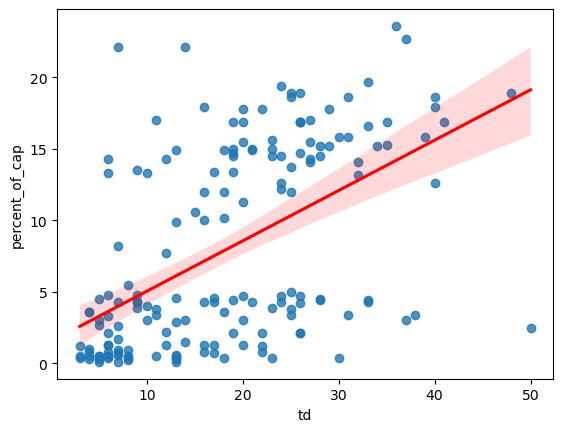

r = 0.5825762745821926
p = 7.826302365313948e-17
There is a relationship between the percent_of_cap and the td of QB's


In [594]:
stats_relationship(train, 'td', 'percent_of_cap')

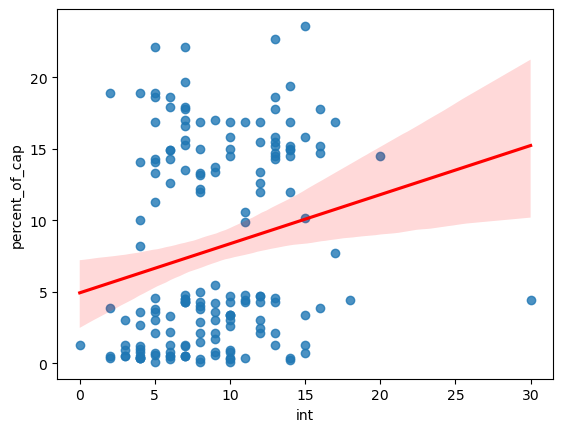

r = 0.25917128074709495
p = 0.0006431066536060447
There is a relationship between the percentage of cap and the ['int'] of QB's


In [530]:
stats_relationship(train, 'int', 'percent_of_cap')

In [536]:
stats_relationship(train, 'td', 'int')

r = 0.4625366133981943
p = 2.1519607488482495e-10
There is a relationship between the percentage of cap and the ['td'] of QB's


In [560]:
stats_relationship(train, 'td_int_ratio', 'pass_att')

r = 0.43243649909026904
p = 3.888509201322969e-09
There is a relationship between the percentage of cap and the ['td_int_ratio'] of QB's


In [632]:
# create the pair plot with the reordered columns
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a

# Explore

In [591]:
df.pass_att / df.int

0       87.142857
1       39.666667
2      298.500000
3      142.250000
4      105.200000
          ...    
279     72.666667
280    105.000000
281     30.000000
282     34.818182
283     34.571429
Length: 284, dtype: float64

In [630]:
feature_corr = train.corr(method='spearman')
feature_corr

time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
time_to_throw                1.000000          0.275809           0.262090   
avg_comp_air_yds             0.275809          1.000000           0.836339   
avg_att_air_yards            0.262090          0.836339           1.000000   
avg_air_yard_diff           -0.064023          0.092664          -0.425668   
aggressive                  -0.304521          0.287649           0.358823   
lon_comp_air_dist            0.236263          0.325702           0.350088   
air_yds_to_sticks            0.212359          0.787072           0.944386   
pass_att                     0.003605          0.076835           0.037411   
total_yds                    0.048649          0.164250           0.079226   
td                           0.083804          0.223749           0.153138   
int                         -0.021262          0.098306           0.101908   
pass_rating                  0.068601          0.166920          -0.002387   
completion_pct              -0.145279         -0.175446          -0.357016   
exp_completion_pct          -0.233261         -0.542514          -0.699344   
completion_pct_abv_exp      -0.032983          0.202733           0.076243   
year                         0.273904         -0.162962          -0.205502   
first_round                  0.034083         -0.024923          -0.062439   
div_round                   -0.065178          0.048374          -0.035482   
conf_champ                  -0.012368          0.084900           0.042256   
superbowl                   -0.132775          0.119806           0.076465   
won_superbowl               -0.035516          0.163081           0.139837   
percent_of_cap              -0.077280         -0.039027          -0.062648   
td_int_ratio                 0.123117          0.129350           0.049001   
avg_yds_per_att              0.127764          0.432109           0.209192   
avg_yds_per_td              -0.103590         -0.183605          -0.164257   
avg_pass_att_per_td         -0.137334         -0.295018          -0.201869   

                        avg_air_yard_diff  aggressive  lon_comp_air_dist  \
time_to_throw                   -0.064023   -0.304521           0.236263   
avg_comp_air_yds                 0.092664    0.287649           0.325702   
avg_att_air_yards               -0.425668    0.358823           0.350088   
avg_air_yard_diff                1.000000   -0.169455          -0.089623   
aggressive                      -0.169455    1.000000          -0.124142   
lon_comp_air_dist               -0.089623   -0.124142           1.000000   
air_yds_to_sticks               -0.418773    0.356446           0.345487   
pass_att                         0.091375   -0.120577           0.450977   
total_yds                        0.158701   -0.174467           0.500331   
td                               0.110867   -0.176627           0.493566   
int                             -0.039798   -0.039316           0.279433   
pass_rating                      0.288786   -0.247181           0.337615   
completion_pct                   0.374679   -0.280699           0.125836   
exp_completion_pct               0.374393   -0.522395           0.000599   
completion_pct_abv_exp           0.225644    0.071067           0.162112   
year                             0.075727   -0.322477           0.047960   
first_round                      0.099790   -0.246196           0.118508   
div_round                        0.113085   -0.169428           0.170027   
conf_champ                       0.027058   -0.190808           0.201453   
superbowl                        0.076830   -0.030003           0.198407   
won_superbowl                    0.040126   -0.012747           0.123821   
percent_of_cap                   0.069526   -0.178958           0.299055   
td_int_ratio                     0.153456   -0.169588           0.288207   
avg_yds_per_att                  0.327343   -0.200623           0.354205   
avg_yds_per_td   

In [631]:
kwargs= {'alpha':.9, 'linewidth':.3, 'linestyle':'-',
        'linecolor':'k', 'rasterized':False, 'edgecolor':'w',
        'capstyle':'projecting',}

plt.figure(figsize=(20,10))
sns.heatmap(feature_corr, cmap='Blues', annot=True, mask = np.triu(feature_corr), **kwargs)


plt.show()

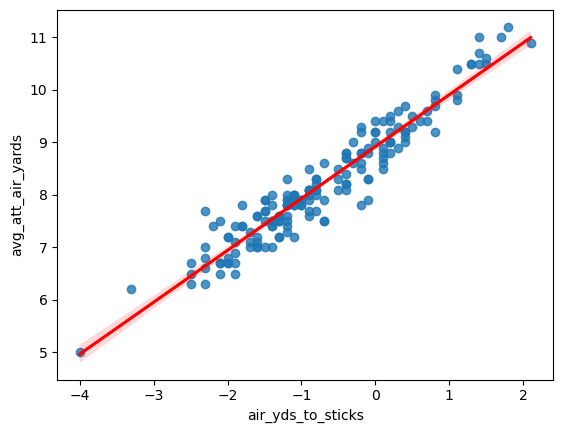

r = 0.9443856116977114
p = 4.6411319988234124e-83
There is a relationship between the avg_att_air_yards and the air_yds_to_sticks of QB's


In [595]:
stats_relationship(train, 'air_yds_to_sticks', 'avg_att_air_yards')

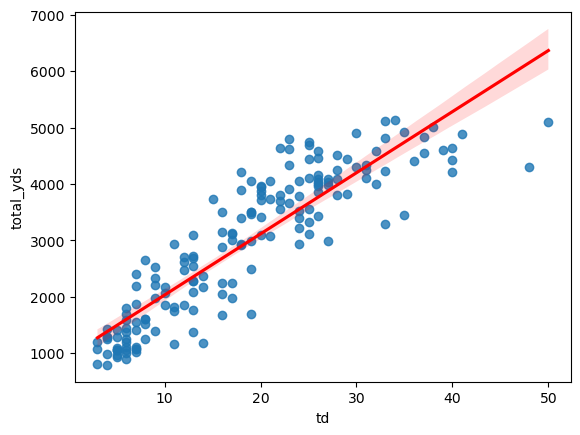

r = 0.9099036210770891
p = 4.2608145844755786e-66
There is a relationship between the total_yds and the td of QB's


In [613]:
stats_relationship(train, 'td', 'total_yds')

In [692]:
df['avg_yds_per_att'] = round((df.total_yds / df.pass_att), 2)

In [689]:
df['avg_yds_per_td'] = round((df.total_yds / df.td), 2)

In [686]:
df['avg_pass_att_per_td'] = round((df.pass_att / df.td),2)

In [697]:
# Calculate touchdown-to-interception ratio
df['td_int_ratio'] = round((df.td / df.int), 2)

In [736]:
df.head()

name team  time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
0  Aaron Rodgers   GB           2.87               6.3                9.2   
1  Aaron Rodgers   GB           2.65               5.0                7.0   
2  Aaron Rodgers   GB           2.95               6.0                8.8   
3  Aaron Rodgers   GB           2.88               5.4                8.9   
4  Aaron Rodgers   GB           2.72               5.5                8.1   

   avg_air_yard_diff  aggressive  lon_comp_air_dist  air_yds_to_sticks  \
0               -3.0        16.4               60.8                0.8   
1               -1.9        14.7               48.3               -1.4   
2               -2.8        13.7               61.4               -0.2   
3               -3.6        14.2               54.9                0.1   
4               -2.6        11.2               60.3               -0.4   

   pass_att  ...  first_round  div_round  conf_champ  superbowl  \
0     610.0  ...          1.0        1.0         1.0        0.0   
1     238.0  ...          0.0        0.0         0.0        0.0   
2     597.0  ...          0.0        0.0         0.0        0.0   
3     569.0  ...          0.0        1.0         1.0        0.0   
4     526.0  ...          0.0        1.0         1.0        0.0   

   won_superbowl  percent_of_cap  td_int_ratio  avg_yds_per_att  \
0            0.0            17.9          5.71             7.26   
1            0.0            17.9          2.67             7.04   
2            0.0            18.9         12.50             7.44   
3            0.0            18.9          6.50             7.03   
4            0.0            18.9          9.60             8.17   

   avg_yds_per_td  avg_pass_att_per_td  
0          110.70                15.25  
1          104.69                14.88  
2          177.68                23.88  
3          153.92                21.88  
4           89.56                10.96  

[5 rows x 28 columns]

In [698]:
df

name team  time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
0    Aaron Rodgers   GB           2.87               6.3                9.2   
1    Aaron Rodgers   GB           2.65               5.0                7.0   
2    Aaron Rodgers   GB           2.95               6.0                8.8   
3    Aaron Rodgers   GB           2.88               5.4                8.9   
4    Aaron Rodgers   GB           2.72               5.5                8.1   
..             ...  ...            ...               ...                ...   
279   Tyrod Taylor  BUF           3.13               7.2                9.9   
280   Tyrod Taylor  BUF           3.02               5.5                8.3   
281   Tyrod Taylor  HOU           2.78               5.2                7.5   
282    Zach Wilson  NYJ           3.00               5.8                7.7   
283    Zach Wilson  NYJ           3.13               6.3                9.2   

     avg_air_yard_diff  aggressive  lon_comp_air_dist  air_yds_to_sticks  \
0                 -3.0        16.4               60.8                0.8   
1                 -1.9        14.7               48.3               -1.4   
2                 -2.8        13.7               61.4               -0.2   
3                 -3.6        14.2               54.9                0.1   
4                 -2.6        11.2               60.3               -0.4   
..                 ...         ...                ...                ...   
279               -2.7        14.2               61.1                0.8   
280               -2.7        15.2               51.7               -1.1   
281               -2.3        17.3               56.4               -0.7   
282               -1.9        12.8               56.8               -1.5   
283               -2.9        15.7               58.3               -0.2   

     pass_att  ...  first_round  div_round  conf_champ  superbowl  \
0       610.0  ...          1.0        1.0         1.0        0.0   
1       238.0  ...          0.0        0.0         0.0        0.0   
2       597.0  ...          0.0        0.0         0.0        0.0   
3       569.0  ...          0.0        1.0         1.0        0.0   
4       526.0  ...          0.0        1.0         1.0        0.0   
..        ...  ...          ...        ...         ...        ...   
279     436.0  ...          0.0        0.0         0.0        0.0   
280     420.0  ...          1.0        0.0         0.0        0.0   
281     150.0  ...          0.0        0.0         0.0        0.0   
282     383.0  ...          0.0        0.0         0.0        0.0   
283     242.0  ...          0.0        0.0         0.0        0.0   

     won_superbowl  percent_of_cap  td_int_ratio  avg_yds_per_att  \
0              0.0            17.9          5.71             7.26   
1              0.0            17.9          2.67             7.04   
2              0.0            18.9         12.50             7.44   
3              0.0            18.9          6.50             7.03   
4              0.0            18.9          9.60             8.17   
..             ...             ...           ...              ...   
279            0.0            11.6          2.83             6.93   
280            0.0             9.1          3.50             6.65   
281            0.0             3.0          1.00             6.44   
282            0.0             4.8          0.82             6.09   
283            0.0             4.8          0.86             6.98   

     avg_yds_per_td  avg_pass_att_per_td  
0            110.70                15.25  
1            104.69                14.88  
2            177.68                23.88  
3            153.92                21.88  
4             89.56                10.96  
..              ...                  ...  
279          177.82                25.65  
280          199.50                30.00  
281          193.20                30.00  
282          259.33                42.56  
283          281.33  

In [732]:
def correlation_tests(train, columns_list, target):
    '''
    Runs a correlation test on dataframe features vs target variable
    '''
    corr_df = pd.DataFrame({'feature': [],
                        'r': [],
                       'p': []})
    for i, col in enumerate(train[columns_list]):
        r, p = stats.pearsonr(train[col], train[target])
        corr_df.loc[i] = [col, abs(r), p]
    to_return = corr_df.sort_values(by='r', ascending=False)
    to_return['target'] = target
    return to_return

In [705]:
columns_list = df.select_dtypes(exclude=['object']).columns.to_list()
target = columns_list.pop(len(columns_list) -5 )

In [742]:
target

'percent_of_cap'

In [820]:
columns_list

['time_to_throw',
 'avg_comp_air_yds',
 'avg_att_air_yards',
 'avg_air_yard_diff',
 'aggressive',
 'lon_comp_air_dist',
 'air_yds_to_sticks',
 'pass_att',
 'total_yds',
 'td',
 'int',
 'pass_rating',
 'completion_pct',
 'exp_completion_pct',
 'completion_pct_abv_exp',
 'year',
 'first_round',
 'div_round',
 'conf_champ',
 'superbowl',
 'won_superbowl',
 'td_int_ratio',
 'avg_yds_per_att',
 'avg_yds_per_td',
 'avg_pass_att_per_td']

In [752]:
new

['avg_yds_per_att', 'avg_yds_per_td', 'avg_pass_att_per_td']

In [753]:
correlation_tests(train, new, target).reset_index().drop(columns = 'index')

feature         r         p          target
0  avg_pass_att_per_td  0.340946  0.000005  percent_of_cap
1       avg_yds_per_td  0.311638  0.000035  percent_of_cap
2      avg_yds_per_att  0.253465  0.000853  percent_of_cap

In [768]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [792]:
train[np.isinf(train.td_int_ratio) == True]

name team  time_to_throw  avg_comp_air_yds  avg_att_air_yards  \
38  Brian Hoyer  CHI           2.49               5.7                8.2   

    avg_air_yard_diff  aggressive  lon_comp_air_dist  air_yds_to_sticks  \
38               -2.5        22.0               45.5               -0.8   

    pass_att  total_yds   td  int  pass_rating  completion_pct  \
38     200.0     1445.0  6.0  0.0         98.0            67.0   

    exp_completion_pct  completion_pct_abv_exp  year  first_round  div_round  \
38                61.8                     5.2  2016          0.0        0.0   

    conf_champ  superbowl  won_superbowl  percent_of_cap  td_int_ratio  \
38         0.0        0.0            0.0             1.3           inf   

    avg_yds_per_att  avg_yds_per_td  avg_pass_att_per_td  
38             7.22          240.83                33.33

In [795]:
np.isinf(df.td_int_ratio).sum()

1

In [ ]:
np.isinf()

In [818]:
# df.td_int_ratio.head(40)

In [807]:
# np.where(np.isinf(df.td_int_ratio), df.td_int_ratio.mean(), df.td_int_ratio)
df.td_int_ratio = np.where(np.isinf(df.td_int_ratio), np.nan, df.td_int_ratio)

In [812]:
df.td_int_ratio = df.td_int_ratio.fillna(df.td_int_ratio.mean())

In [815]:
df.td_int_ratio = round((df.td_int_ratio), 2)

In [823]:
correlation_tests(train, columns_list, target).reset_index().drop(columns = 'index')

feature         r             p          target
0                total_yds  0.544151  1.729665e-14  percent_of_cap
1                 pass_att  0.543016  2.007672e-14  percent_of_cap
2                       td  0.533725  6.665897e-14  percent_of_cap
3              pass_rating  0.410384  2.727552e-08  percent_of_cap
4             td_int_ratio  0.375517  4.513354e-07  percent_of_cap
5           completion_pct  0.349275  3.037556e-06  percent_of_cap
6      avg_pass_att_per_td  0.340946  5.373249e-06  percent_of_cap
7           avg_yds_per_td  0.311638  3.522136e-05  percent_of_cap
8       exp_completion_pct  0.274073  2.984785e-04  percent_of_cap
9          avg_yds_per_att  0.253465  8.528929e-04  percent_of_cap
10  completion_pct_abv_exp  0.227828  2.808117e-03  percent_of_cap
11       lon_comp_air_dist  0.220230  3.904487e-03  percent_of_cap
12                     int  0.209845  6.023370e-03  percent_of_cap
13               div_round  0.191376  1.242001e-02  percent_of_cap
14              aggressive  0.190977  1.260742e-02  percent_of_cap
15             first_round  0.158544  3.892429e-02  percent_of_cap
16              conf_champ  0.125011  1.043114e-01  percent_of_cap
17       avg_att_air_yards  0.120255  1.182773e-01  percent_of_cap
18       avg_air_yard_diff  0.119512  1.205850e-01  percent_of_cap
19           time_to_throw  0.090721  2.393728e-01  percent_of_cap
20       air_yds_to_sticks  0.068321  3.760166e-01  percent_of_cap
21           won_superbowl  0.063426  4.112494e-01  percent_of_cap
22        avg_comp_air_yds  0.062790  4.159616e-01  percent_of_cap
23               superbowl  0.015822  8.377383e-01  percent_of_cap
24                    year  0.015284  8.431825e-01  percent_of_cap

In [828]:
df = pd.read_clipboard()

In [830]:
df.to_csv('pivot_final.csv', index=False)